<a href="https://colab.research.google.com/github/EthanW67/Machine-Learning-Research/blob/main/Research_Projects/6_6_2024_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchmetrics.image import StructuralSimilarityIndexMeasure, PeakSignalNoiseRatio
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor and scales to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Define the average pooling layer
pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

# Apply the pooling layer
# Here we'll just demonstrate it on a single batch
for images, labels in train_loader:
    downsampled_images = pool(images)
    print("Shape of original images:", images.shape)  # Shape will be [64, 1, 28, 28] for a batch of 64 images
    print("Shape of downsampled images:", downsampled_images.shape)  # Shape will be [64, 1, 14, 14]
    break  # We break after one batch just for demonstration purposes

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36519158.94it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2660276.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8583865.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8014526.20it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Shape of original images: torch.Size([64, 1, 28, 28])
Shape of downsampled images: torch.Size([64, 1, 14, 14])


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple super-resolution model using convolutional layers
class SuperResolutionModel(nn.Module):
    def __init__(self):
        super(SuperResolutionModel, self).__init__()
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.upsample(x)
        x = self.relu(self.conv1(x))
        x = self.conv2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SuperResolutionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define a function to train the model
def train(model, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, _ in train_loader:
            # Apply pooling to simulate low-resolution images
            low_res_images = pool(images)
            # Move tensors to the appropriate device
            low_res_images = low_res_images.to(device)
            high_res_images = images.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(low_res_images)
            loss = criterion(outputs, high_res_images)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch {epoch+1}: Loss {running_loss / len(train_loader)}')


# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train the model
train(model, criterion, optimizer)

Epoch 1: Loss 0.04295168218733088
Epoch 2: Loss 0.022363735362887383
Epoch 3: Loss 0.020846422350625875
Epoch 4: Loss 0.019643554277320913
Epoch 5: Loss 0.018857756672280113


In [6]:
psnr = PeakSignalNoiseRatio()
psnr.to(device)
ssim = StructuralSimilarityIndexMeasure(data_range=1.0)
ssim.to(device)

StructuralSimilarityIndexMeasure()

Validation Loss: 0.01808245245746936
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
tensor(23.4658)
tensor(0.8920)


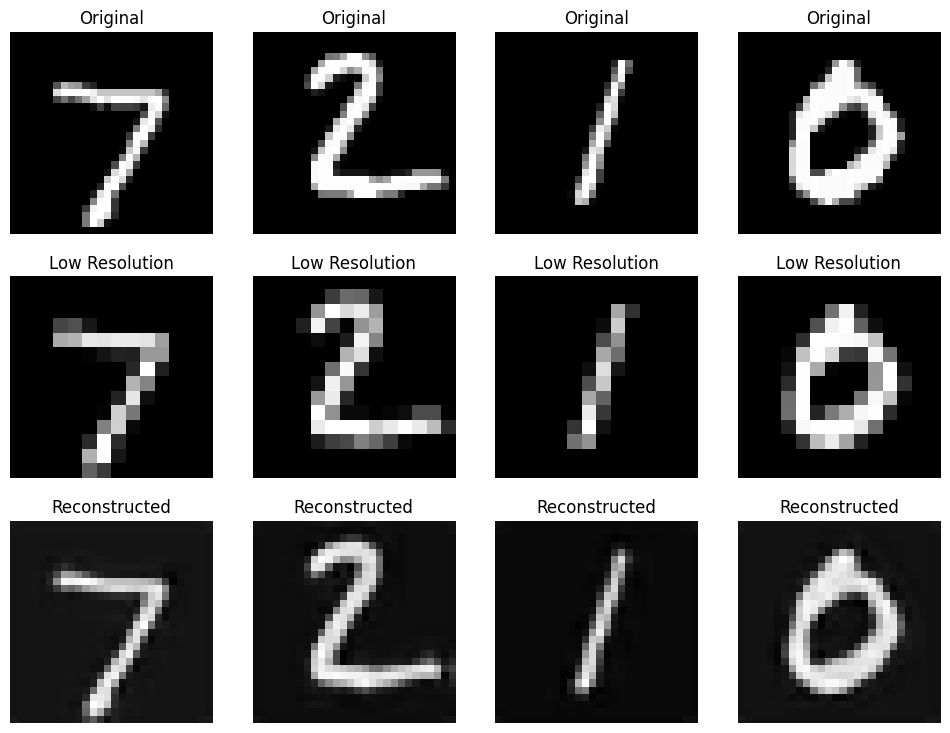

In [7]:
import matplotlib.pyplot as plt

def validate(model, loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    criterion = nn.MSELoss()
    with torch.no_grad():  # No need to track gradients
        for images, _ in loader:
            low_res_images = pool(images)
            low_res_images = low_res_images.to(device)
            high_res_images = images.to(device)

            outputs = model(low_res_images)
            loss = criterion(outputs, high_res_images)
            total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    print(f'Validation Loss: {avg_loss}')
    return avg_loss

def visualize_results(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:

            print(images.shape)
            low_res_images = pool(images)
            low_res_images = low_res_images.to(device)
            outputs = model(low_res_images)
            print(outputs.shape)

            # Convert first 4 images in the batch from PyTorch tensors to NumPy arrays
            input_images = low_res_images[:4].cpu().numpy()
            reconstructed_images = outputs[:4].cpu().numpy()
            original_images = images[:4].numpy()

            PSNR_value = psnr(outputs, images)

            print(PSNR_value)
            SSIM_value = ssim(outputs, images)

            print(SSIM_value)

            # Plotting
            fig, axes = plt.subplots(3, 4, figsize=(12, 9))
            for i in range(4):
                # Display original images
                ax = axes[0][i]
                ax.imshow(original_images[i].reshape(28, 28), cmap='gray')
                ax.title.set_text('Original')
                ax.axis('off')

                # Display low resolution images
                ax = axes[1][i]
                ax.imshow(input_images[i].reshape(14, 14), cmap='gray')
                ax.title.set_text('Low Resolution')
                ax.axis('off')

                # Display reconstructed images
                ax = axes[2][i]
                ax.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
                ax.title.set_text('Reconstructed')
                ax.axis('off')

            plt.show()
            break  # Only show one batch of images

# Perform validation
validate(model, test_loader)

# Visualize some results
visualize_results(model, test_loader)


Validation Loss: 0.01808245245746936


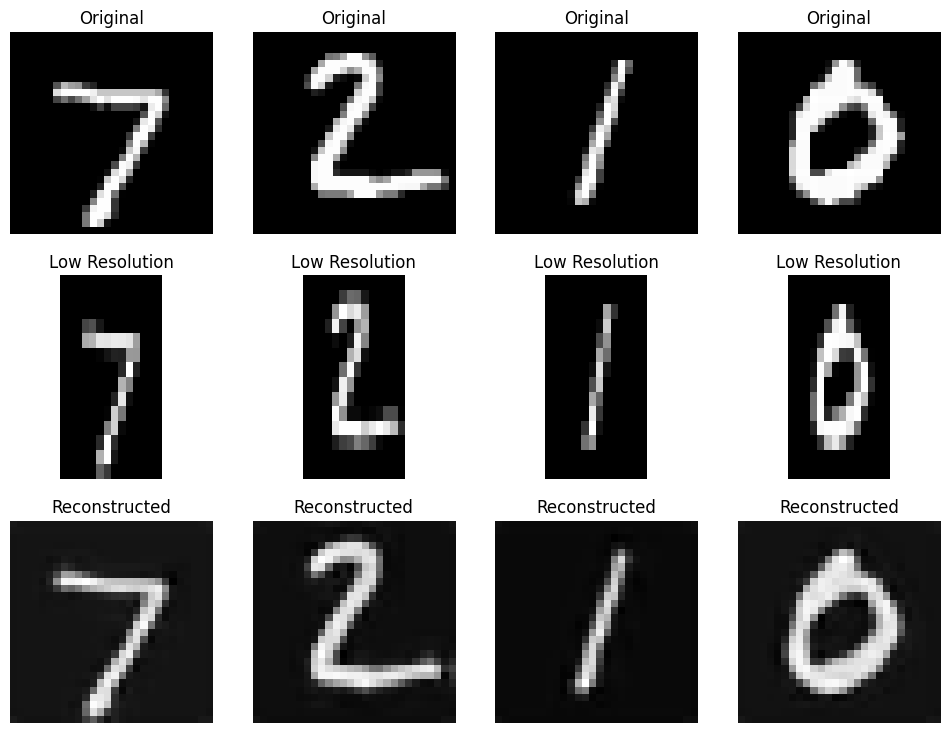

In [8]:
import matplotlib.pyplot as plt

def visualize_results(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            low_res_images = pool(images)
            low_res_images = low_res_images.to(device)
            outputs = model(low_res_images)

            # Convert first 4 images in the batch from PyTorch tensors to NumPy arrays
            input_images = low_res_images[:4].cpu().numpy()
            reconstructed_images = outputs[:4].cpu().numpy()
            original_images = images[:4].numpy()

            # Plotting
            fig, axes = plt.subplots(3, 4, figsize=(12, 9))
            for i in range(4):
                # Display original images
                ax = axes[0][i]
                ax.imshow(original_images[i].reshape(28, 28), cmap='gray', interpolation='none')
                ax.title.set_text('Original')
                ax.axis('off')

                # Display low resolution images
                ax = axes[1][i]
                ax.imshow(input_images[i].reshape(14, 14), cmap='gray', interpolation='none')
                ax.title.set_text('Low Resolution')
                # Adjust aspect ratio to match the physical display size of 28x28 images
                ax.set_aspect(28/14)
                ax.axis('off')

                # Display reconstructed images
                ax = axes[2][i]
                ax.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray', interpolation='none')
                ax.title.set_text('Reconstructed')
                ax.axis('off')

            plt.show()
            break  # Only show one batch of images
# Perform validation
validate(model, test_loader)

# Visualize some results
visualize_results(model, test_loader)


Validation Loss: 0.01808245245746936


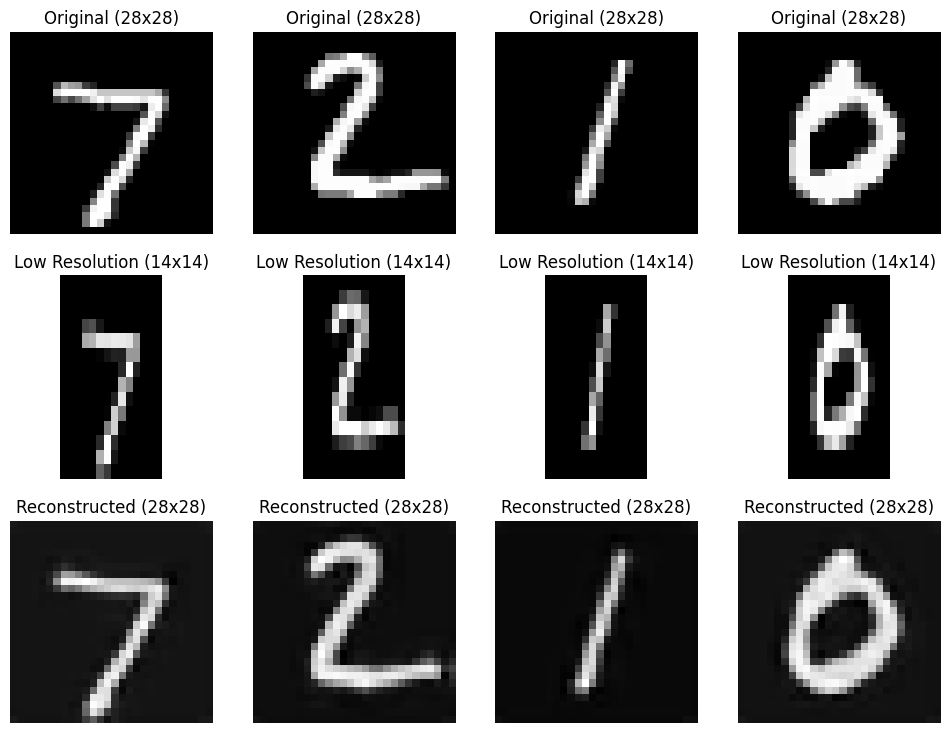

In [9]:
import matplotlib.pyplot as plt

def visualize_results(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            low_res_images = pool(images)
            low_res_images = low_res_images.to(device)
            outputs = model(low_res_images)

            # Convert first 4 images in the batch from PyTorch tensors to NumPy arrays
            input_images = low_res_images[:4].cpu().numpy()
            reconstructed_images = outputs[:4].cpu().numpy()
            original_images = images[:4].numpy()

            # Plotting
            fig, axes = plt.subplots(3, 4, figsize=(12, 9))
            for i in range(4):
                # Display original images
                ax = axes[0][i]
                ax.imshow(original_images[i].reshape(28, 28), cmap='gray', interpolation='none')
                ax.title.set_text('Original (28x28)')
                ax.axis('off')

                # Display low resolution images
                ax = axes[1][i]
                ax.imshow(input_images[i].reshape(14, 14), cmap='gray', interpolation='none')
                ax.title.set_text('Low Resolution (14x14)')
                # Adjust aspect ratio to match the physical display size of 28x28 images
                ax.set_aspect(28/14)
                ax.axis('off')

                # Display reconstructed images
                ax = axes[2][i]
                ax.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray', interpolation='none')
                ax.title.set_text('Reconstructed (28x28)')
                ax.axis('off')

            plt.show()
            break  # Only show one batch of images

# Perform validation
validate(model, test_loader)

# Visualize some results
visualize_results(model, test_loader)

